In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Download data
tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT' , 'TSLA']
data = yf.download(tickers, start='2020-01-01', end='2025-01-01', group_by='ticker', auto_adjust=True)

# Extract 'Close' prices from each ticker into a flat DataFrame
adj_close = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})



[*********************100%***********************]  5 of 5 completed


In [2]:

   adj_close.shape

(1258, 5)

In [3]:
daily_returns = adj_close.pct_change().dropna()
daily_returns.head()

,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2020-01-03,-0.009722,-0.012139,-0.005232,-0.012452,0.029633
2020-01-06,0.007968,0.014886,0.026654,0.002585,0.019255
2020-01-07,-0.004703,0.002092,-0.001932,-0.009118,0.038801
2020-01-08,0.016086,-0.007809,0.007118,0.015929,0.049205
2020-01-09,0.021241,0.004799,0.010498,0.012493,-0.021945


In [4]:
# Calculate average return and volatility
avg_daily_return = daily_returns.mean()
daily_volatility = daily_returns.std()

# Combine into one table
summary_stats = pd.DataFrame({
    'Average Daily Return': avg_daily_return,
    'Daily Volatility (Std Dev)': daily_volatility
})

print(summary_stats)


       Average Daily Return  Daily Volatility (Std Dev)
AAPL               0.001182                    0.019956
AMZN               0.000923                    0.022655
GOOGL              0.001022                    0.020472
MSFT               0.000988                    0.019211
TSLA               0.002997                    0.042320


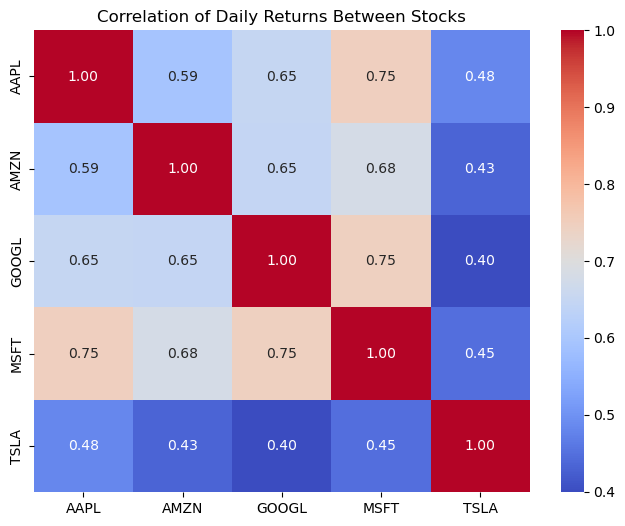

In [5]:
# Calculate correlation matrix
correlation_matrix = daily_returns.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Daily Returns Between Stocks")
plt.show()


RAW STOCK CLOSING PRICES

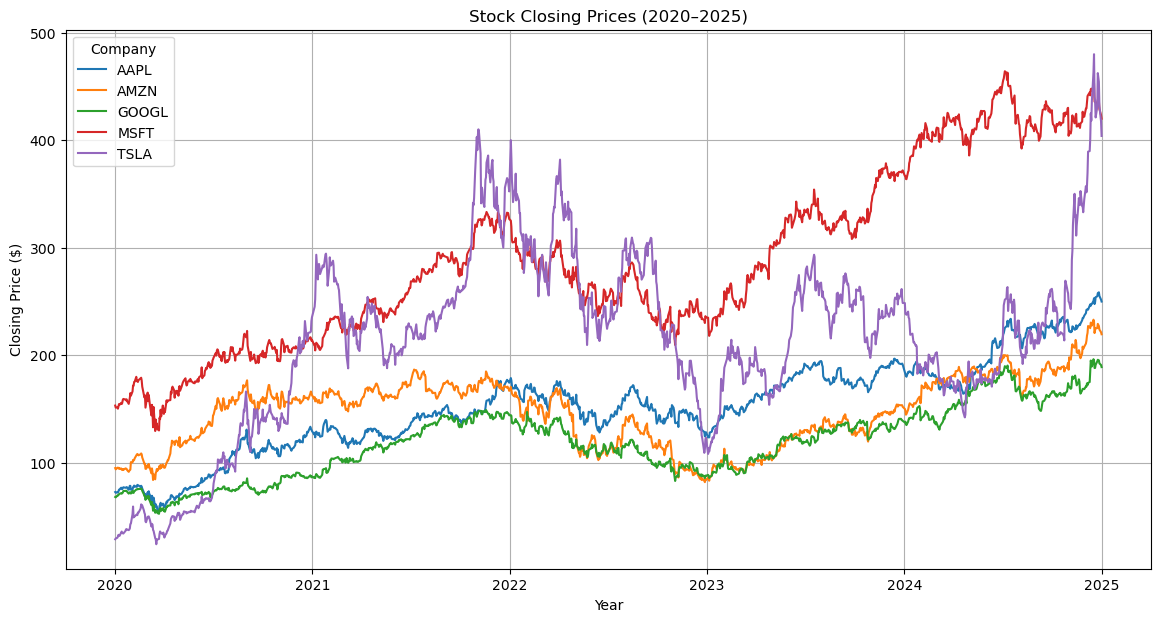

In [6]:
plt.figure(figsize=(14, 7))

for ticker in tickers:
    plt.plot(adj_close.index, adj_close[ticker], label=ticker)

plt.title('Stock Closing Prices (2020–2025)')
plt.xlabel('Year')
plt.ylabel('Closing Price ($)')
plt.legend(title='Company')
plt.grid(True)
plt.show()

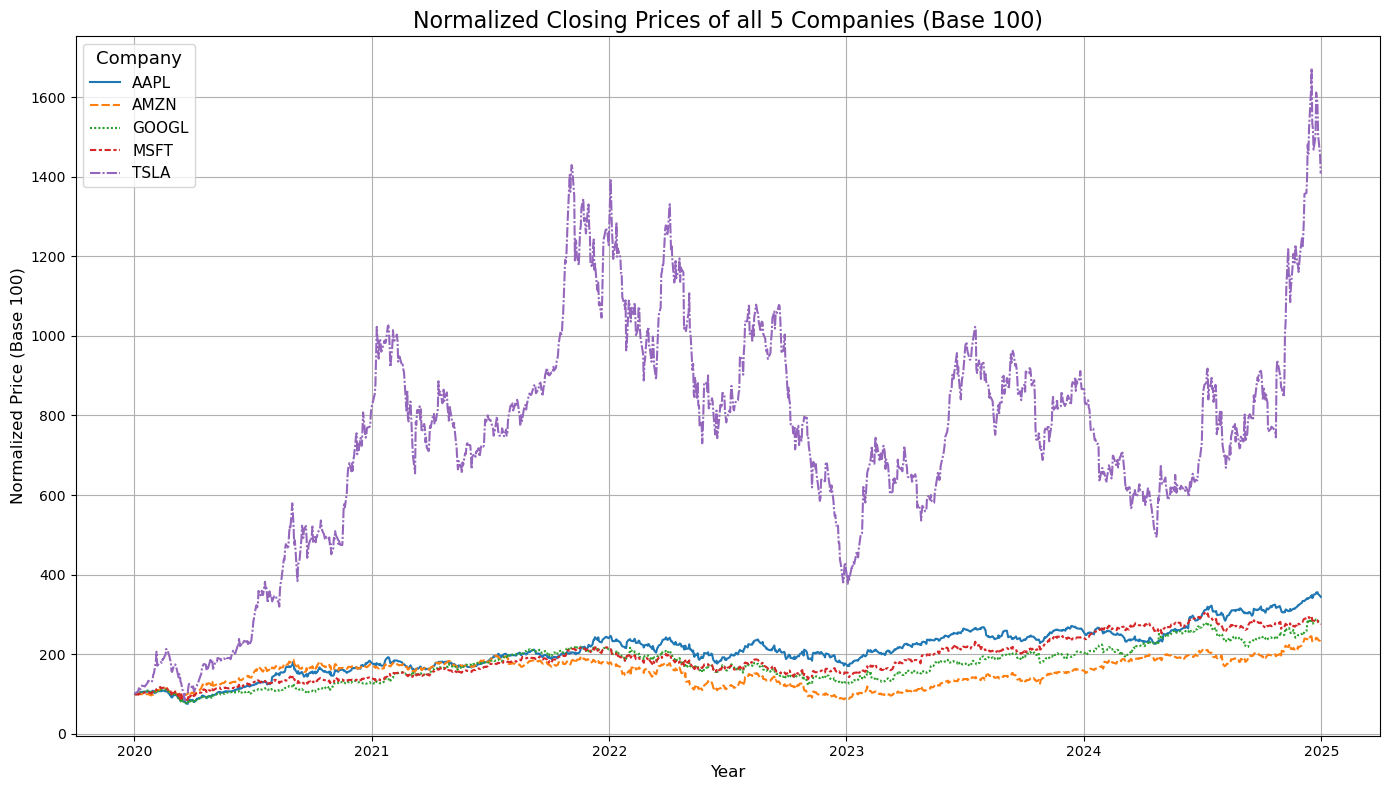

In [7]:
# Normalizing closing prices to a base of 100 on the first day
normalized_prices_adj_close = adj_close / adj_close.iloc[0] * 100

plt.figure(figsize=(14, 8))
sns.lineplot(data=normalized_prices_adj_close)
plt.title('Normalized Closing Prices of all 5 Companies (Base 100)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Price (Base 100)', fontsize=12)
plt.legend(title='Company', title_fontsize='13', fontsize=11, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df = yf.download('MSFT', start='2020-01-01', end='2025-01-01', auto_adjust=True)
# Use only the 'Close' column for prediction
df = df[['Close']]
df.dropna(inplace=True)
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            MSFT
Date                  
2020-01-02  153.042313
2020-01-03  151.136642
2020-01-06  151.527328
2020-01-07  150.145691
2020-01-08  152.537292
